In [1]:
import Pkg; Pkg.add("StatsBase")
using Pkg
Pkg.add("BosonSampling")
using StatsBase
using LinearAlgebra;
using Pkg
Pkg.add("Plots")
using BosonSampling
using Plots



    Updating registry at `C:\Users\Sanaa Sharma\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\Sanaa Sharma\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\Sanaa Sharma\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Sanaa Sharma\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\Sanaa Sharma\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Sanaa Sharma\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\Sanaa Sharma\.julia\environments\v1.9\Manifest.toml`


In [2]:
import Pkg;

#Pkg.add("BosonSampling")
using BosonSampling

#Pkg.add("StatsBase")
using StatsBase

#Pkg.add("Plots")
using Plots

#Pkg.add("InvertedIndices")
using InvertedIndices

#Pkg.add("Distances")
using Distances

#Pkg.add("Random")
using Random

#Pkg.add("Measures")
using Measures

#Pkg.add("LaTeXStrings")
using LaTeXStrings

In [3]:
using Pkg
Pkg.add("BenchmarkTools")
using BenchmarkTools


   Resolving package versions...
  No Changes to `C:\Users\Sanaa Sharma\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\Sanaa Sharma\.julia\environments\v1.9\Manifest.toml`


In [6]:
 
n = 2;m = 6;
numsamples=10
my_interf = RandHaar(m);  #number of samples (for total probability distribution, dmb=m and minimum number of samples=binomial(n+dmb-1,n))

array_of_vectors = [Vector{Int64}(undef, 4) for _ in 1:numsamples]; 
    my_input = Input{Bosonic}(ModeOccupation(random_occupancy(n,m)));
       for i in 1:numsamples                                       # Clifford Sampler takes numsamples (Number of samples) for each randomized initial state
        res = cliffords_sampler(input=my_input, interf=my_interf)
       # println(res)
        array_of_vectors[i]= res
    end

In [7]:
numinitstates=10; # number of output permutations

larger_dictionary = Dict{String, Any}() # large dictionary for results

dis = zeros(Real, numinitstates)
elapsed_time = @elapsed for j in 1:numinitstates # permuting over random input states
   # MODE Binning
    b=2 #chooses binning strategy. b=1 for unbinned distribution
    mode_numbers = 1:m
    dmb=Int(trunc(m/b)) #number of bins 
    fin_list = []
    del_list = []
   for i in 1:(m/b)
    dum_list = zeros(Int64,m)    
    dum_pos = sample((mode_numbers)[Not(del_list)],b,replace=false)
    append!(del_list,dum_pos) 
    dum_list[dum_pos].=1
    push!(fin_list,dum_list)
    end
        if m%b!=0
        dum_list = zeros(Int64,m)
        dum_pos = sample((mode_numbers)[Not(del_list)],m%b,replace=false)
        append!(del_list,dum_pos)
        dum_list[dum_pos].=1
        push!(fin_list,dum_list)
        end
    part=[]
    for i in fin_list
        for j in 1:length(i)
            if i[j]==1
                part=push!(part,j)
           
            else 
                nothing
            end
        end  
    end
        num_subarrays = dmb

        subarrays = []
        chunk_size = div(length(part), dmb)

        for i in 1:dmb
            start_index = (i - 1) * chunk_size + 1
            end_index = min(i * chunk_size, length(part))
            push!(subarrays, part[start_index:end_index])
        end

        println(subarrays)

    
    
    #counter to bin the samples into bins defined above using subarrays
    counter = Vector{Vector{Int64}}(undef, numsamples)
      for i in 1:numsamples
        counter[i] = fill(0, dmb)
    end   
    
    for i in 1:length(array_of_vectors)
        for s in 1:length(array_of_vectors[i])     
            for l in 1:length(subarrays)
                for k in 1:length(subarrays[l])
                    if array_of_vectors[i][s]== subarrays[l][k]
                        counter[i][l]=counter[i][l] + 1    
                    else
                        nothing
                    end            
                end
            end    
        end
    end
   
     # println(counter)
  
     converted = map(string, counter)
    counts = countmap(converted) #counting values for different initial states and adding to the larger_dictionary
    larger_dictionary["$j"] = counts 
    
end



Any[Any[5, 6], Any[3, 4], Any[1, 2]]
Any[Any[2, 5], Any[1, 6], Any[3, 4]]
Any[Any[1, 2], Any[3, 6], Any[4, 5]]
Any[Any[5, 6], Any[1, 3], Any[2, 4]]
Any[Any[1, 2], Any[4, 5], Any[3, 6]]
Any[Any[2, 6], Any[1, 3], Any[4, 5]]
Any[Any[1, 4], Any[2, 6], Any[3, 5]]
Any[Any[3, 6], Any[1, 2], Any[4, 5]]
Any[Any[1, 4], Any[2, 3], Any[5, 6]]
Any[Any[4, 6], Any[2, 3], Any[1, 5]]


1.2391779

In [9]:

reference_dict = first(values(larger_dictionary)) # Using one permutation (out of numinitstates) as the reference
reference_keys = sort(collect(keys(reference_dict)))  # Extract the keys from one of the dictionaries as reference


# Get the set of all labels present in the smaller dictionaries
all_labels = union(keys.(values(larger_dictionary))...)

# Check if all smaller dictionaries have the same labels
if length(all_labels) == 1
    println("All dictionaries have the same labels.")
else
    for (dict_key, inner_dict) in larger_dictionary
        missing_labels = setdiff(all_labels, keys(inner_dict))
        for label in missing_labels
            inner_dict[label] = 0  # Add the missing label with a default value of 0
        end
    end
end

# Print the updated larger dictionary
#println(larger_dictionary)



# Create new dictionaries with keys arranged in the desired order
new_dictionary = Dict{String, Dict{String, Int64}}()
for (dict_key, inner_dict) in larger_dictionary
    #println(dict_key)
    #println(inner_dict)
    sorted_inner_dict = Dict{String, Int64}()
    for key in reference_keys
        #println(key)
            sorted_inner_dict[key] = inner_dict[key]
            new_dictionary[dict_key] = sorted_inner_dict
        
    end
        
    #end
    
end
# println(new_dictionary)
# The new_dict will have dictionaries with keys arranged in the same order

difference = [] 
res = zeros(Float64, 1)


# Perform subtraction on the shared keys
for (key,inner_dict) in new_dictionary
    shared_keys= intersect(keys(reference_dict), keys(inner_dict))
           #println(shared_keys)
    result= []

     for keyy in shared_keys
       res = (new_dictionary[key][keyy] - reference_dict[keyy])/numsamples  # finding the DTV values of different numinitstates states
        #println(res)
        
        result = [result; res]
        #println(result)
      
   end
  #typeof(difference)
  difference = push!(difference, result)
 #   println(difference)
    
end

new_result = zeros(Float64, numinitstates) 

for i in 1:length(difference)
    for j in 1:length(difference[i])
       # println(abs(result[i][j]))
        new_result[i] = new_result[i] + 0.5*(abs(difference[i][j])) #adding absolute values
        
    end
end
#println(new_result)




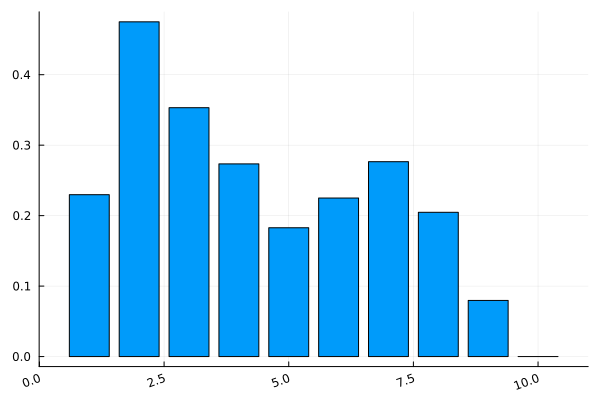

In [10]:

Plots.bar(new_result,label="Distance between different binning strategies", xrotation = 20, legend = false)



    


In [11]:
v= new_result/sqrt(numsamples)
v = filter(x -> x != 0, v)
minimum(v)

0.025199400104466772

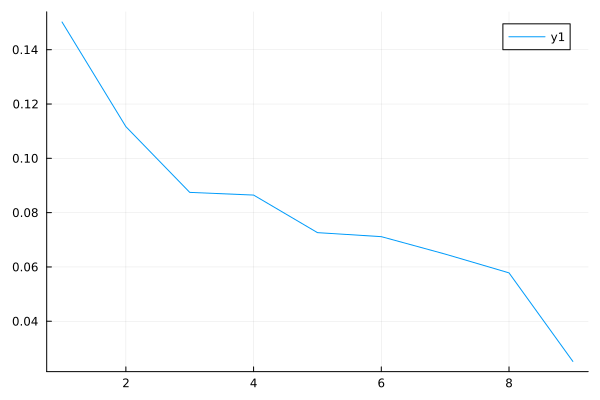

In [12]:
v=sort(v,rev=true)
plot(v)

In [13]:
maximum(v)


0.15020818885799803

In [14]:
mean(v)

0.08081376242652523